[1] Package import

In [89]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#sigmoid function
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))


[2] make array and initilize value

In [90]:
#Total datanum
datanum= 118

#Epoch
epoch = 1000000

# array for graph
OF_loss_Array=np.zeros((epoch,1))
OF_AC_Array=np.zeros((epoch,1))
JR_loss_Array=np.zeros((epoch,1))
JR_AC_Array=np.zeros((epoch,1))
UF_loss_Array=np.zeros((epoch,1))
UF_AC_Array=np.zeros((epoch,1))

x_epoch=np.arange(epoch)

#each theta 
dimension = 100 
OF_W = np.zeros(dimension)
JR_W = np.zeros(dimension)
UF_W = np.zeros(dimension)

OF_W = OF_W.reshape((10,10,1))
JR_W = JR_W.reshape((10,10,1))
UF_W = UF_W.reshape((10,10,1))


#initailization
for i in range(10):
    for j in range(10):
        OF_W[i][j] = np.random.randn(1)*0.1
        JR_W[i][j] = np.random.randn(1)*0.1
        UF_W[i][j] = np.random.randn(1)*0.1

#learning Rate
lr=0.01 

#each ramda
OF_ramda = 0.00000001
JR_ramda = 0.01
UF_ramda = 1


[3] read train data

In [91]:
data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

x= pointX
y= pointY


[4] Processing Gradient decent(training)

In [92]:
for iter in range(epoch):
    
    if(iter>2500):
        #adjust lr
        lr= 0.001
    
    #Overfitting
    #calculate function
    z = 0
    for i in range(10):
        for j in range(10):
            z = z + OF_W[i][j] * ((x**i)*(y**j))
    h =sigmoid(z)
    
    #calcualte regularization
    regularization = 0
    for i in range(10):
        for j in range(10):
            regularization = regularization + OF_W[i][j] * OF_W[i][j]
    
    #calculate loss
    loss=-(label*np.log(h)+(1-label)*np.log(1-h))
    loss=(1/datanum)*np.sum(loss)+ (OF_ramda/2) * regularization
    OF_loss_Array[iter]=loss
    
    #calculate the train AC
    trainPY=np.where(h>=0.5,1.,0.)
    ac=((trainPY == label).sum())/datanum
    OF_AC_Array[iter]=ac
        
    # update the parameters
    for i in range(10):
        for j in range(10):
            OF_W[i][j] = (1 - OF_ramda *lr) * OF_W[i][j] - lr * (1/datanum*np.sum((h-label)*((x**i)*(y**j))))
    
    
    #Just-Right
    #calculate function
    z = 0
    for i in range(10):
        for j in range(10):
            z = z + JR_W[i][j] * ((x**i)*(y**j))
    h =sigmoid(z)
    
    #calcualte regularization
    regularization = 0
    for i in range(10):
        for j in range(10):
            regularization = regularization + JR_W[i][j] * JR_W[i][j]
    
    #calculate loss
    loss=-(label*np.log(h)+(1-label)*np.log(1-h))
    loss=(1/datanum)*np.sum(loss)+ (JR_ramda/2) * regularization
    JR_loss_Array[iter]=loss
    
    #calculate the train AC
    trainPY=np.where(h>=0.5,1.,0.)
    ac=((trainPY == label).sum())/datanum
    JR_AC_Array[iter]=ac
        
    # update the parameters
    for i in range(10):
        for j in range(10):
            JR_W[i][j] = (1 - JR_ramda *lr) * JR_W[i][j] - lr * (1/datanum*np.sum((h-label)*((x**i)*(y**j))))
    
    
    #Underfitting
    #calculate function
    z = 0
    for i in range(10):
        for j in range(10):
            z = z + UF_W[i][j] * ((x**i)*(y**j))
    h =sigmoid(z)
    
    #calcualte regularization
    regularization = 0
    for i in range(10):
        for j in range(10):
            regularization = regularization + UF_W[i][j] * UF_W[i][j]
    
    #calculate loss
    loss=-(label*np.log(h)+(1-label)*np.log(1-h))
    loss=(1/datanum)*np.sum(loss)+ (UF_ramda/2) * regularization
    UF_loss_Array[iter]=loss
    
    #calculate the train AC
    trainPY=np.where(h>=0.5,1.,0.)
    ac=((trainPY == label).sum())/datanum
    UF_AC_Array[iter]=ac
        
    # update the parameters
    for i in range(10):
        for j in range(10):
            UF_W[i][j] = (1 - UF_ramda *lr) * UF_W[i][j] - lr * (1/datanum*np.sum((h-label)*((x**i)*(y**j))))
 

[5] Plot the training data

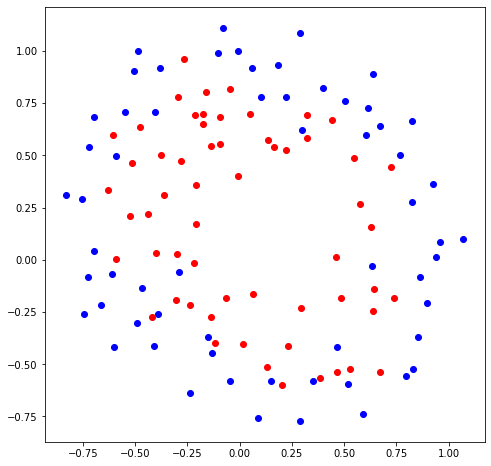

In [93]:
plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

[6] Plot the training error with varying regularization parameters

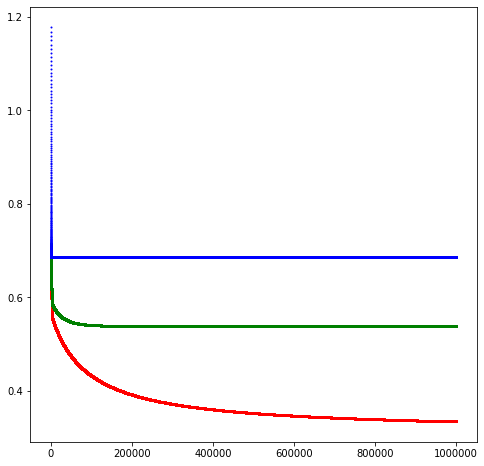

In [94]:
plt.figure(figsize=(8, 8))
plt.scatter(x_epoch,OF_loss_Array,c="red",s=1)
plt.scatter(x_epoch,JR_loss_Array,c="green",s=1)
plt.scatter(x_epoch,UF_loss_Array,c="blue",s=1)
plt.show()

[7] Display the values of the chosen regularization parameters

Overfitting_ramda :
1e-08


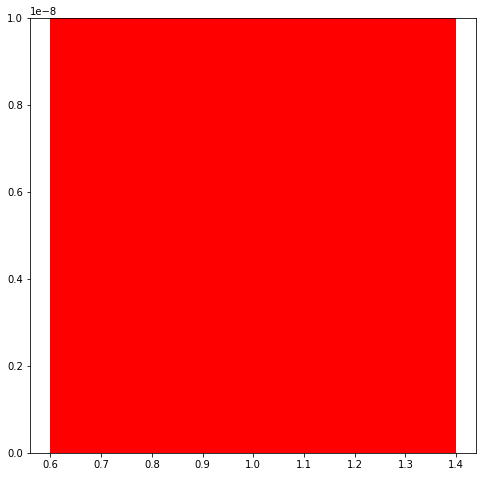

Just-right_ramda :
0.01


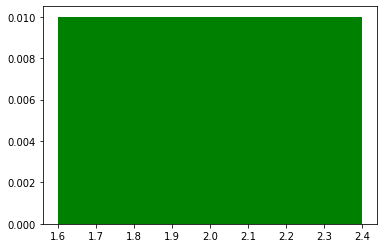

Underfitting_ramda :
1


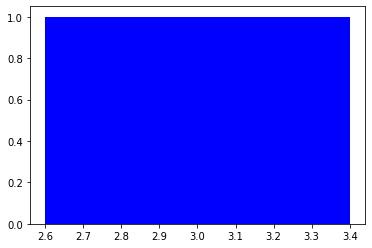

In [95]:
plt.figure(figsize=(8, 8))
print("Overfitting_ramda :")
print(OF_ramda)
plt.bar(x=1,height=OF_ramda,color="red")
plt.show()
print("Just-right_ramda :")
print(JR_ramda)
plt.bar(x=2,height=JR_ramda,color="green")
plt.show()
print("Underfitting_ramda :")
print(UF_ramda)
plt.bar(x=3,height=UF_ramda,color="blue")
plt.show()

[8] Plot the training accuracy with varying regularization parameters

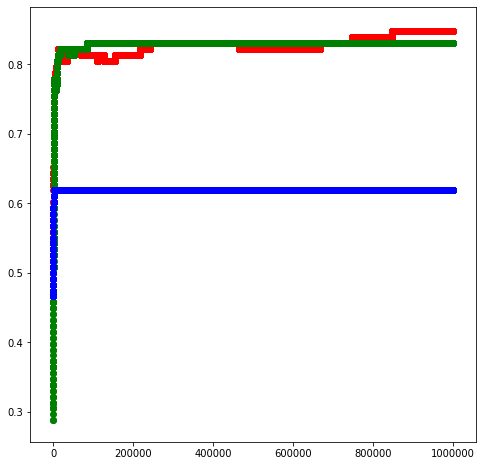

In [101]:
plt.figure(figsize=(8, 8))
plt.scatter(x_epoch,OF_AC_Array,c="red")
plt.scatter(x_epoch,JR_AC_Array,c="green")
plt.scatter(x_epoch,UF_AC_Array,c="blue")
plt.show()

[9] Display the final training accuracy with varying regularization parameters

Overfitting_AC :
[0.84745763]
Just-right_AC :
[0.83050847]
Underfitting_AC :
[0.61864407]


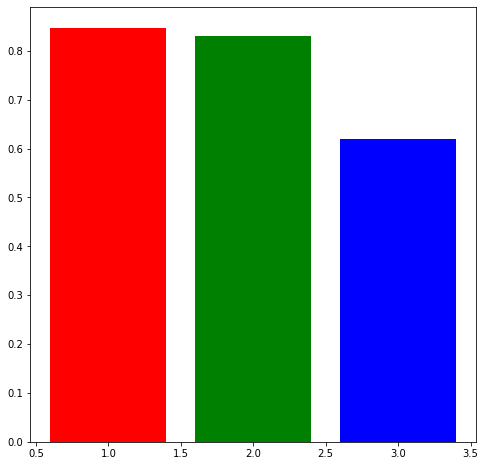

In [100]:
plt.figure(figsize=(8, 8))
print("Overfitting_AC :")
print(OF_AC_Array[epoch-1])
print("Just-right_AC :")
print(JR_AC_Array[epoch-1])
print("Underfitting_AC :")
print(UF_AC_Array[epoch-1])
plt.bar(x=1,height=OF_AC_Array[epoch-1],color="red")
plt.bar(x=2,height=JR_AC_Array[epoch-1],color="green")
plt.bar(x=3,height=UF_AC_Array[epoch-1],color="blue")
plt.show()

[10] Plot the optimal classifier with varying regularization parameters superimposed on the training data

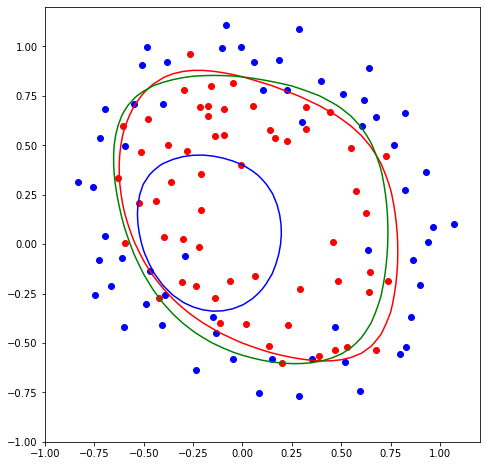

In [98]:
x_ = np.arange(-1.0, 1.25, 0.05)
y_ = np.arange(-1.0, 1.25, 0.05)
X, Y = np.meshgrid(x_, y_)
OF_Z = 0
for i in range(10):
    for j in range(10):
        OF_Z = OF_Z + OF_W[i][j] * ((X**i)*(Y**j))
        
JR_Z = 0
for i in range(10):
    for j in range(10):
        JR_Z = JR_Z + JR_W[i][j] * ((X**i)*(Y**j))
        
UF_Z = 0
for i in range(10):
    for j in range(10):
        UF_Z = UF_Z + UF_W[i][j] * ((X**i)*(Y**j))
        
plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.contour(X, Y, OF_Z,levels=0,colors ="red")
plt.contour(X, Y, JR_Z,levels=0,colors="green")
plt.contour(X, Y, UF_Z,levels=0,colors ="blue")
plt.show()